## Tensorboard

(based on a tutorial by Python Engineer in Youtube)

Tensorboard is a visualization tool to analyze our model and training pipeline.

- Tracking and visualizing metrics such as loss and accuracy
- Visualizing the model graph (ops and layers)
- Viewing histograms of weights, biases, or other tensors as they change over time
- Projecting embeddings to a lower dimensional space
- Displaying images, text, and audio data
- Profiling TensorFlow programs
- And much more


In [2]:
import torch
import html 
import cgi 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import sys
import matplotlib.pyplot as plt

In [3]:
from torch.utils.tensorboard import SummaryWriter

In [4]:
#create a writer with the directory
writer = SummaryWriter("runs")

In [5]:
#device config
#if we have GPU it will work with it else with CPU, we must push our tensors to the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [20]:
# hyperparameters
input_size = 784   #because the images are 28x28 and we will flat the array to 1D tensor
hidden_size = 500  #you can use other dim too.
num_classes = 10   #we have 10 classes in the dataset
num_epochs = 1      #so that it won't get long time
batch_size = 64
learning_rate = 0.001

In [21]:
# import MNIST data
#must be in the same folder, it's for training, we add a transform and convert data to tensors, it must be 
#downloaded if we have'nt done that yet
train_dataset = torchvision.datasets.MNIST(root='./data', train=True
                                          ,transform = transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False
                                          ,transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size
                                          , shuffle=True) # shuffle is good for training

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [22]:
#let's look at one batch of this data
examples = iter(train_loader)
example_data, example_targets = examples.next()
print(example_data.shape, example_targets.shape) 

torch.Size([64, 1, 28, 28]) torch.Size([64])


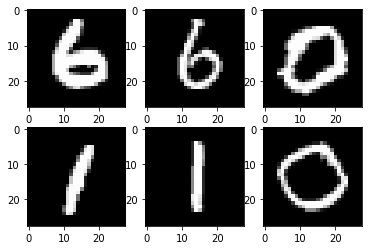

In [23]:
#plot
for i in range(6):
    plt.subplot(2, 3, i+1)   #2 raws, 3 columns, in index i+1
    plt.imshow(example_data[i][0], cmap='gray')
    #we want to show the actual data here, [i][0] to access the first channel, and the color map is set to gray


In [24]:
#instead of plotting plt.show() we can add the images into tensorboard
img_grid = torchvision.utils.make_grid(example_data)
writer.add_image('mnist_images',img_grid)

writer.close()   #all the outputs have been flashed

# if you were in the middle of a code and you were coding in visual studio for example and just wanted to see
# the data you must put a code to exit here so sys.exit()

Now if we reload the tab of tensorboard, we will see:
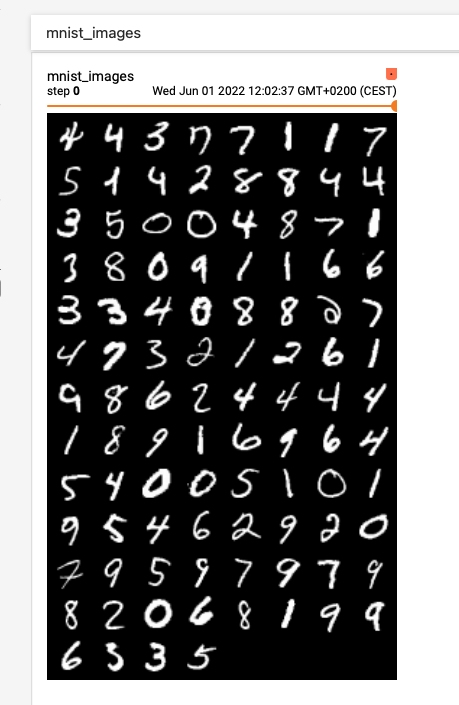

This is 8x8 because we define it as such.